# Bagging and Boosting Analysis of Tour and Travel Customer Churn Data

## 1.0 Business understanding

### 1.1 Business objective

### 1.2 Situational assessment

* Customer churn is a problem in many businesses, including travel and tour companies.
* Travel and tour companies gather data on their customers that can help predict customer churn.
* Analysis of travel and tour compaany customer data provides an opportunity to identify customers at risk of leaving.
* Providing travel and tour company decision makers with insights extracted from their customer data can create opportunities to mitigate customer churn and improve performance.

**Research Question #1:**
Are there key factors that contribute to tavel and tour company customer churn?

**Hypothesis Couplet**

Null Hypothesis (H<sub>0</sub>): There are no key factors that contribute to travael and tour company customer churn?


Alternate Hypothesis (H<sub>1</sub>): There are key factors that contribute to travel and tour company customer churn?


## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Data mining goals

#### 2.1.2 Import libraries

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import itertools
import graphviz
import warnings

In [350]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import silhouette_score as ss
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mlxtend.plotting import plot_decision_regions
from google.colab import files
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, IsolationForest, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#### 2.1.3 Suppress warnings

In [351]:
warnings.filterwarnings('ignore')

#### 2.1.4 Data ingestion

In [352]:
# Import dataset
#create 2-dimensional dataFrames from a imported data.
#Choose the local file (baseball.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving Customertravel.csv to Customertravel (9).csv


In [353]:
file_name = "Customertravel.csv"

In [354]:
# Load dataset
df=pd.read_csv(file_name)
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


#### 2.1.5 Data description

**High Level Data Dictionary**

* Age: Age of user
* FrequentFlyer: Whether customer takes frequent flights
* AnnualIncomeClass: Class of annual income of user
* ServicesOpted: Number of times services opted during recent years
* AccountSyncedToSocialMedia: Whether company account of user is synchronized to social media
* BookedHotelOrNot: Whether the customer books lodging/hotels using company services
* Target: Customer doesn't churn (0), or customer churns (1)

In [355]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [356]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [357]:
df.describe(include='object')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


### 2.2 Data quality

#### 2.2.1 Check for missing values

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


There are no missing values.

#### 2.2.2 Check for outliers

In [359]:
feature_df = df.drop(['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'], axis=1)

In [360]:
rows, cols = 1, 2
num_columns = len(feature_df.columns)
num_plots = min(rows * cols, num_columns)

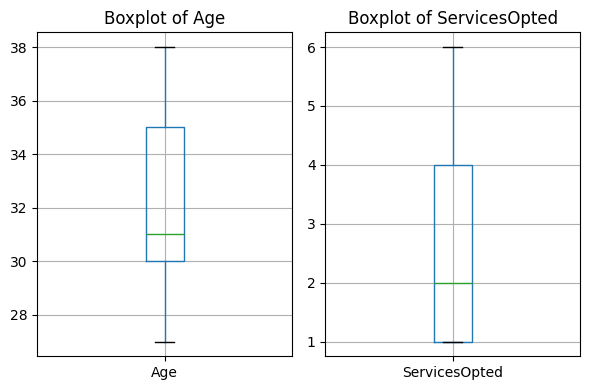

In [361]:
fig, axes = plt.subplots(rows, cols, figsize=(6, 4))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There are no outliers.

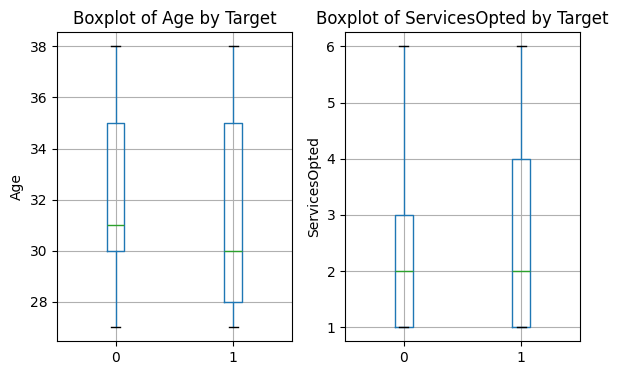

In [362]:
rows, cols = 1, 2
fig, axes = plt.subplots(rows, cols, figsize=(6, 4))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    df.boxplot(column=column, by='Target', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Target')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

fig.suptitle('')
plt.tight_layout()
plt.show()

#### 2.2.3 Check for duplicates

In [363]:
df.duplicated().sum()

np.int64(507)

There are no duplicate rows.

### 2.3 Exploratory data analysis

#### 2.3.1 Check distributions of numeric variables

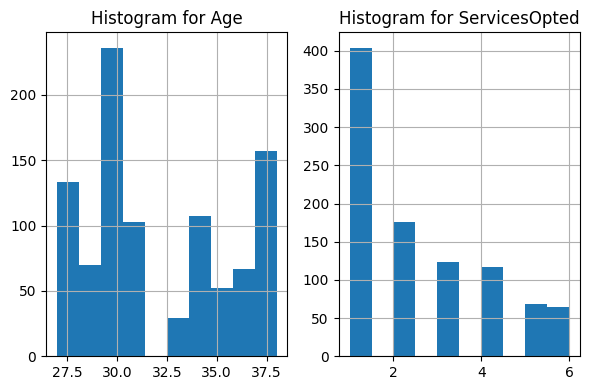

In [364]:
rows, cols = 1, 2
fig, axes = plt.subplots(rows, cols, figsize=(6, 4))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.hist(column=column, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

All but three numeric variables have skewed distributions.

#### 2.3.2 Check density of numeric variables

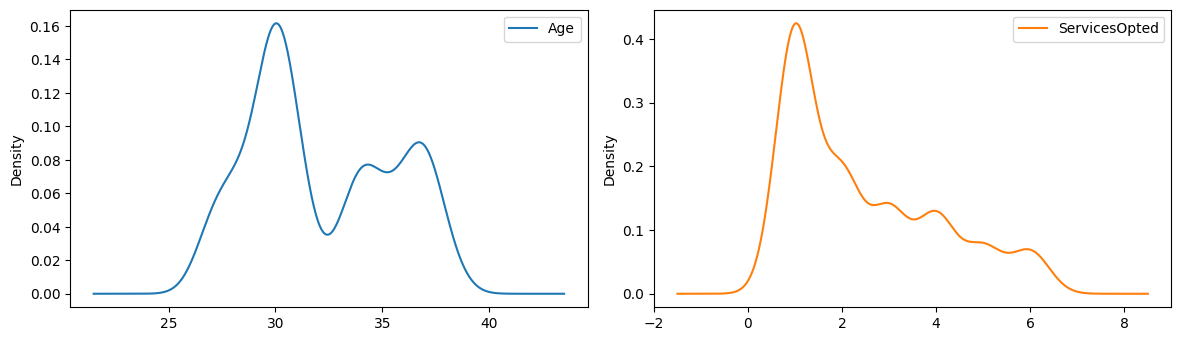

In [365]:
feature_df.plot(kind='density', subplots=True, layout=(3,2), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()

#### 2.3.3 Check skewness of continuous numeric variables

In [366]:
num_cols = ['Age', 'ServicesOpted']

In [367]:
df[num_cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
Age,0.265206
ServicesOpted,0.840178


Age is skewed right due to the high number of outliers.

#### 2.3.3 Check corrleations of numeric variables

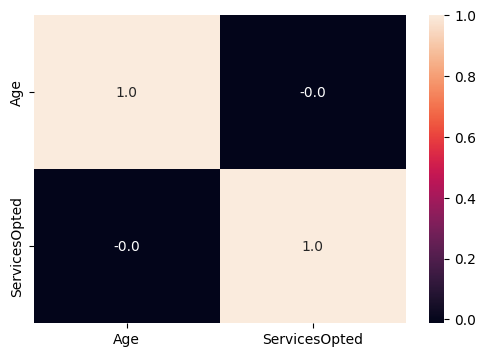

In [368]:
plt.figure(figsize=[6,4],facecolor='white')
sns.heatmap(feature_df.corr(), annot=True, fmt=".1f")
plt.show()

None of the features are correlated.

#### 2.3.4 Count of churned customers

In [369]:
print(df['Target'].value_counts())

Target
0    730
1    224
Name: count, dtype: int64


#### 2.3.5 Customers churned by categorical feature

In [370]:
def cust_churn_cat(column):
  plt.figure(figsize=(12,6))
  ax = sns.countplot(x=column, hue='Target', data=df)
  for val in ax.containers:
    ax.bar_label(val)
  plt.title(f'Customers Churned by {column}')
  plt.show()

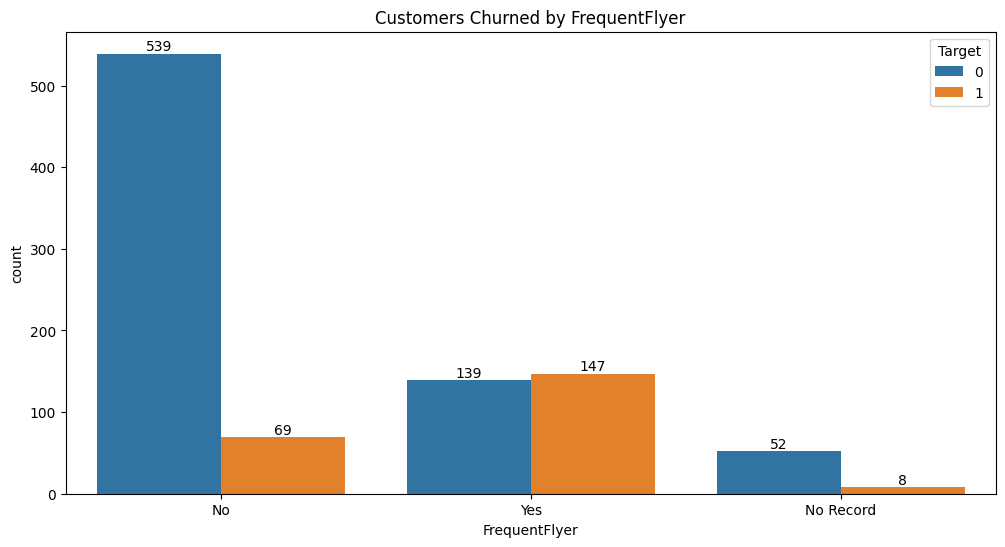

In [371]:
cust_churn_cat('FrequentFlyer')

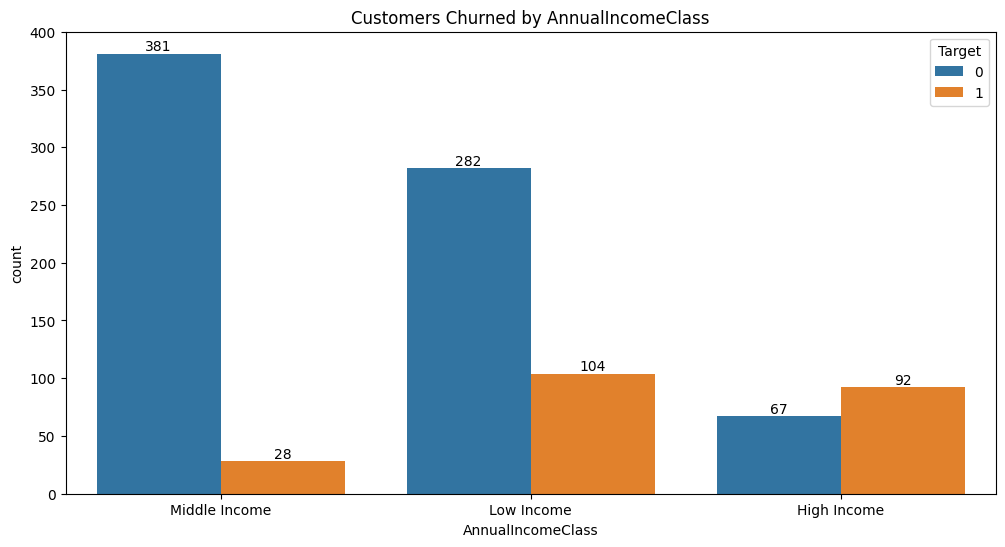

In [372]:
cust_churn_cat('AnnualIncomeClass')

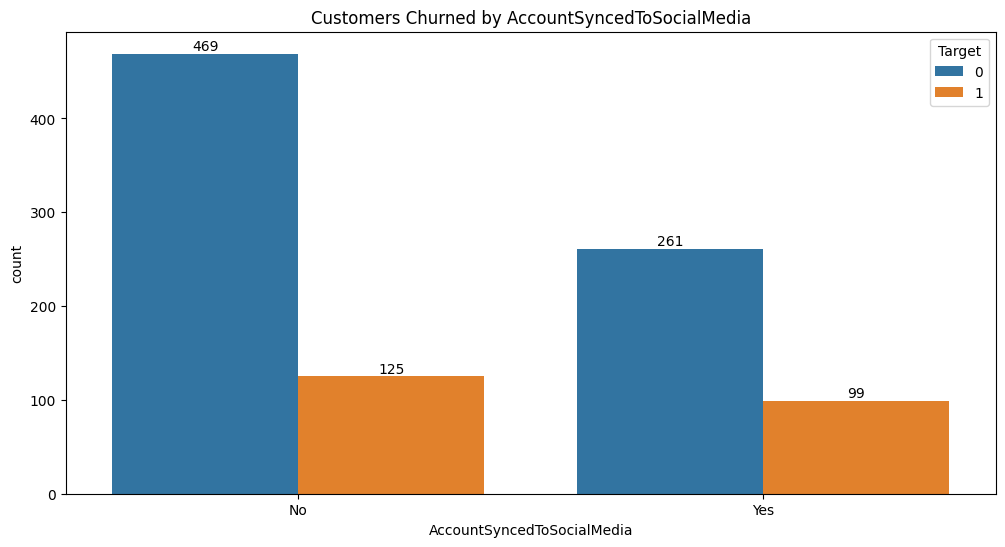

In [373]:
cust_churn_cat('AccountSyncedToSocialMedia')

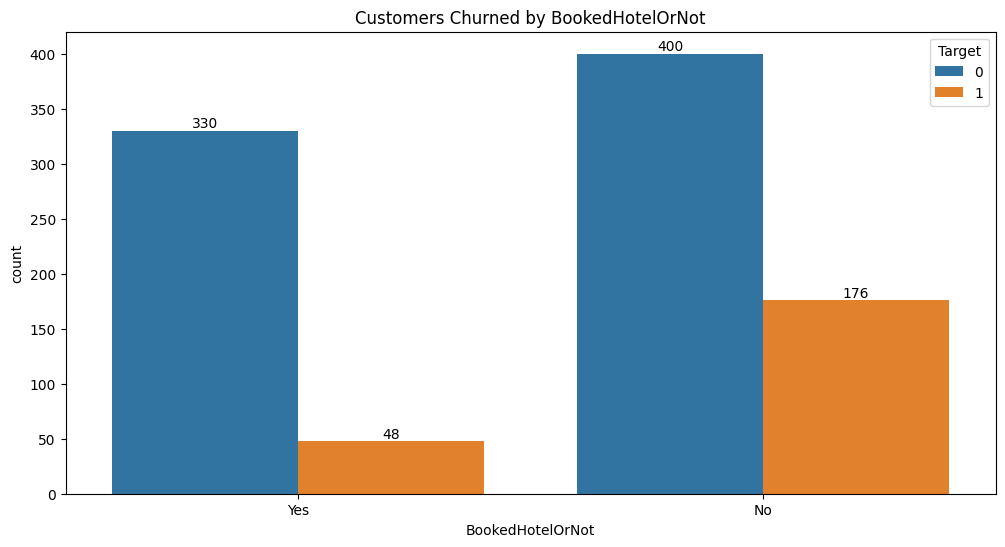

In [374]:
cust_churn_cat('BookedHotelOrNot')

#### 2.3.6 Customers churned by numerical feature

In [375]:
def cust_churn_num(column):
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  sns.histplot(x=column, hue='Target', data=df)
  plt.title(f'Distribution of {column} by Churn Status')

  plt.subplot(1,2,2)
  sns.boxplot(x='Target', y=column, data=df)
  plt.title(f'Distribution of {column} by Churn Status')

  plt.tight_layout()
  plt.show()

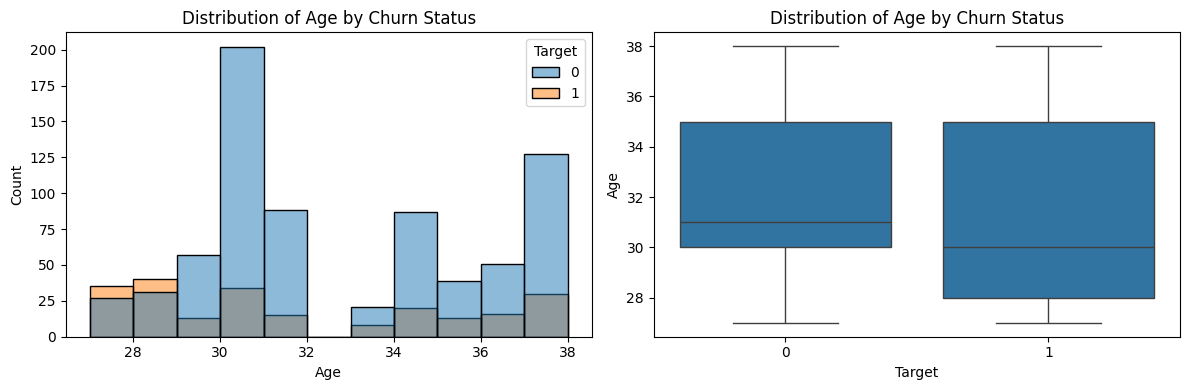

In [376]:
cust_churn_num('Age')

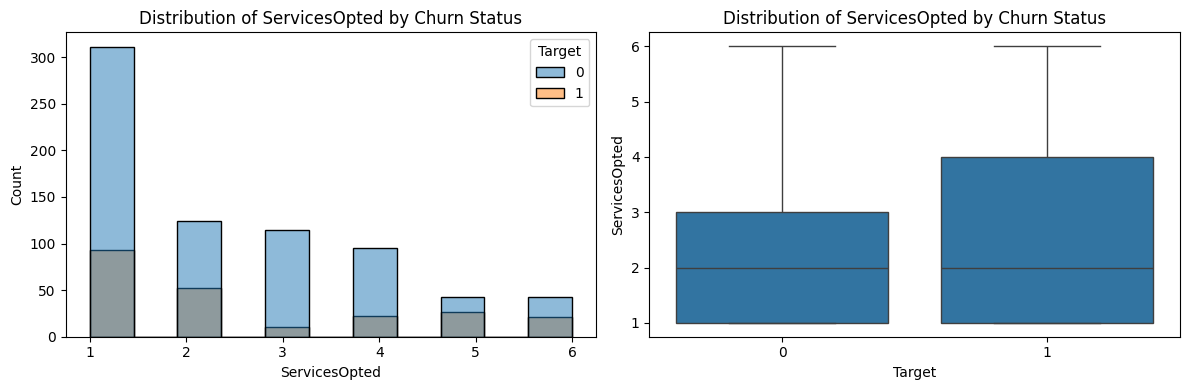

In [377]:
cust_churn_num('ServicesOpted')

## 3.0 Data preprocessing

### 3.1 Data cleansing

#### 3.1.1 No missing values

#### 3.1.2 Drop duplicate rows

In [378]:
df = df.drop_duplicates()
df.shape

(447, 7)

#### 3.1.3 No highly correlated features

### 3.2 Feature engineering

#### 3.2.1 Create categorical variables

In [379]:
cat_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

In [380]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [381]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [382]:
df.head()

,Age,Target,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,ServicesOpted_1,ServicesOpted_2,ServicesOpted_3,ServicesOpted_4,ServicesOpted_5,ServicesOpted_6,AccountSyncedToSocialMedia_No,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_No,BookedHotelOrNot_Yes
0,34,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
1,34,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0
2,37,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,30,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
4,30,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0


#### 3.2.2 Log transform of age

In [383]:
prior_age = df["Age"]

In [384]:
df["Age"] = np.log(df["Age"])

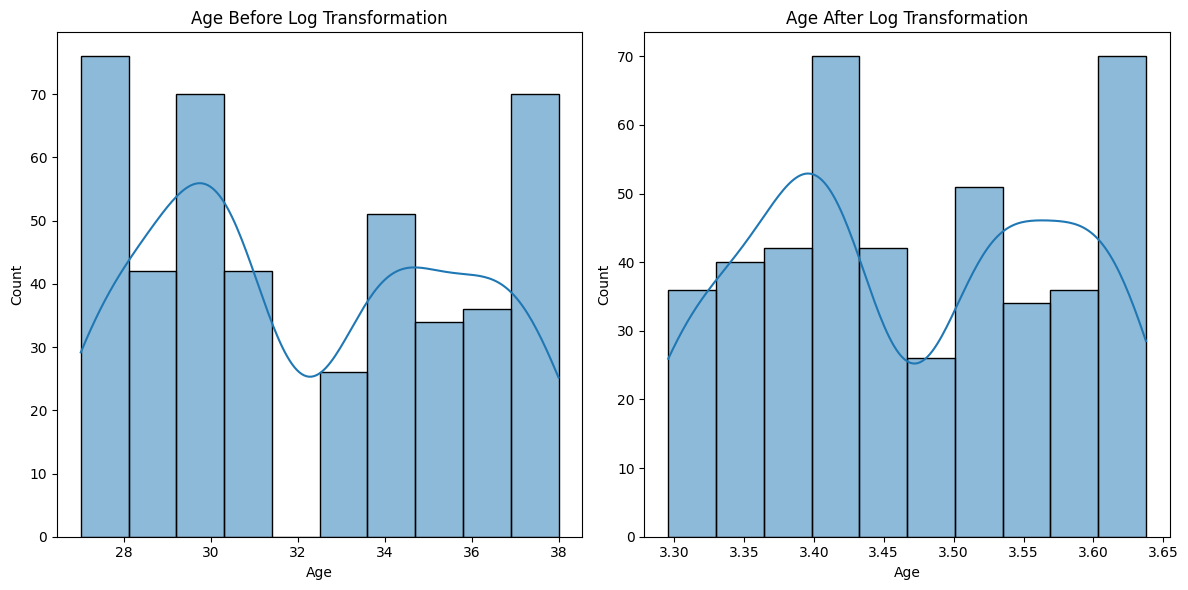

In [385]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x=prior_age, kde=True)
plt.title("Age Before Log Transformation")

plt.subplot(1,2,2)
sns.histplot(x=df["Age"], kde=True)
plt.title("Age After Log Transformation")

plt.tight_layout()
plt.show()

### 3.3 Data partitioning

In [386]:
X = df.drop(columns=["Target"])
y = df["Target"]

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [388]:
print("Shape of x_train is:",X_train.shape)
print("Shape of x_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (357, 17)
Shape of x_test is:  (90, 17)
Shape of y_train is: (357,)
Shape of y_test is:  (90,)


### 3.4 Data transformation

#### 3.4.1 Scale numeric variables

In [389]:
scaler = StandardScaler()

In [390]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.5984156 ,  0.87098834, -0.37493343, ..., -0.8610827 ,
         0.8660254 , -0.8660254 ],
       [-1.57938781, -1.14812099, -0.37493343, ..., -0.8610827 ,
        -1.15470054,  1.15470054],
       [ 1.09911199, -1.14812099,  2.66714011, ...,  1.16132864,
        -1.15470054,  1.15470054],
       ...,
       [ 1.35421355,  0.87098834, -0.37493343, ...,  1.16132864,
        -1.15470054,  1.15470054],
       [-1.24078233,  0.87098834, -0.37493343, ...,  1.16132864,
        -1.15470054,  1.15470054],
       [ 0.28898171,  0.87098834, -0.37493343, ..., -0.8610827 ,
        -1.15470054,  1.15470054]])

In [391]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-1.64753303, -1.04547753,  3.        , ..., -0.77919372,
         0.81649658, -0.81649658],
       [-0.98326447, -1.04547753, -0.33333333, ..., -0.77919372,
         0.81649658, -0.81649658],
       [ 0.49536985,  0.95650071, -0.33333333, ...,  1.2833779 ,
         0.81649658, -0.81649658],
       ...,
       [-1.64753303,  0.95650071, -0.33333333, ..., -0.77919372,
        -1.22474487,  1.22474487],
       [ 0.49536985, -1.04547753,  3.        , ..., -0.77919372,
         0.81649658, -0.81649658],
       [-0.66812227,  0.95650071, -0.33333333, ..., -0.77919372,
        -1.22474487,  1.22474487]])

#### 3.4.2 Reduce class imbalance

In [392]:
smt = SMOTE(random_state=42)

In [393]:
X_train_balance,y_train_balance = smt.fit_resample(X_train,y_train)

In [394]:
print(X_train_balance.shape ,y_train_balance.shape)

(520, 17) (520,)


In [395]:
y_train_balance.value_counts().to_frame()

,count
Target,
0,260
1,260


#### 3.4.3 Random forest grid search with cross validation

In [396]:
#rfc = RandomForestClassifier()

In [397]:
'''
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}
'''

'\nparam_grid = {"max_depth":[3,4,5,6,7,8],\n              "min_samples_split":[3,4,5,6,7,8],\n              "min_samples_leaf":[3,4,5,6,7,8],\n              "n_estimators": [50,70,90,100],\n              "criterion":["gini","entropy"]}\n'

In [398]:
'''
param_grid = {"max_depth":[20,40,60,80,100],
              "min_samples_split":[3,6,9,12,15],
              "min_samples_leaf":[3,4,5,6,7,8],
              "max_features":["auto","sqrt","log2"],
              "n_estimators": [200,400,600,800,1000],
              "criterion":["gini","entropy"]}
'''

'\nparam_grid = {"max_depth":[20,40,60,80,100],\n              "min_samples_split":[3,6,9,12,15],\n              "min_samples_leaf":[3,4,5,6,7,8],\n              "max_features":["auto","sqrt","log2"],\n              "n_estimators": [200,400,600,800,1000],\n              "criterion":["gini","entropy"]}\n'

In [399]:
#grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

In [400]:
#grid_search.fit(X_train_balance,y_train_balance)

In [401]:
'''
best_parameters = grid_search.best_params_
print("Best Parameters for RandomForest Model is:\n\n")
best_parameters
'''

'\nbest_parameters = grid_search.best_params_\nprint("Best Parameters for RandomForest Model is:\n\n")\nbest_parameters\n'

## 4.0 Modeling

### 4.1 Weak learner decision tree classifier

In [402]:
decision_tree_model = DecisionTreeClassifier(
    max_depth=10, max_features=10
)

In [403]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=10)

In [404]:
decision_tree_predictions = decision_tree_model.predict(X_test)

### 4.2 Bagging classifer with base decision tree classifier

In [405]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, max_features=10),
    n_estimators=10,
    random_state=42
)

In [406]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   max_features=10),
                  random_state=42)

In [407]:
bagging_predictions = bagging_model.predict(X_test)

### 4.3 Random forest bagging classifier

In [408]:
random_forest_model = RandomForestClassifier(
    criterion='entropy', max_features='log2',
    min_samples_leaf=4, min_samples_split=3, max_depth=8,
    n_estimators=10
)

In [409]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=10)

In [410]:
random_forest_predictions = random_forest_model.predict(X_test)

### 4.4 AdaBoost classifier with base decision tree classifier

In [411]:
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, max_features=10),
    n_estimators=100, random_state=42, algorithm="SAMME"
)

In [412]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    max_features=10),
                   n_estimators=100, random_state=42)

In [413]:
adaboost_predictions = adaboost_model.predict(X_test)

### 4.5 XGBoost classifier

In [414]:
xgboost_model = XGBClassifier(
    n_estimators=200, max_depth=3, learning_rate=0.5,
    eval_metric='logloss'
)

In [415]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [416]:
xgboost_predictions = xgboost_model.predict(X_test)

## 5.0 Evaluation

### 5.1 Model evaluation function

In [417]:
def model_evaluation(model, df, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred  = model.predict(X_test)

  print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
  print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")
  print()
  print("F1 Score of the Model is =>",round(f1_score(y_test,y_test_pred)*100,2),"%")
  print("Recall Score of the Model is =>",round(recall_score(y_test,y_test_pred)*100,2),"%")
  print("Precision Score of the Model is =>",round(precision_score(y_test,y_test_pred)*100,2),"%")
  print()

  if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
  elif hasattr(model, "estimators_") and hasattr(model.estimators_[0], "feature_importances_"):
    importances = np.mean(
        [est.feature_importances_ for est in model.estimators_],
        axis=0
    )
  else:
    importances = None
  #X_train_features = pd.DataFrame(X_train, columns=df.drop(columns=["Target"]).columns)
  #feature_importance_df = pd.DataFrame({"Feature Name":X_train_features.columns,
  #                     "Importance":model.feature_importances_})
  #features = feature_importance_df.sort_values(by="Importance",ascending=False)

  if importances is not None:
    X_train_features = pd.DataFrame(X_train, columns=df.drop(columns=["Target"]).columns)
    feature_importance_df = pd.DataFrame({
        "Feature Name": X_train_features.columns,
        "Importance": importances
    })
    features = feature_importance_df.sort_values(by="Importance", ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
    plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
    plt.yticks(size=12)
    plt.show()
    plt.tight_layout()

  cm = confusion_matrix(y_test,y_test_pred)

  plt.figure(figsize=(8,6))
  sns.heatmap(data=cm, linewidth=0.5, annot=True, fmt="g", cmap="Set1", annot_kws={"size": 16})
  plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
  plt.ylabel("Actual Labels")
  plt.xlabel("Predicted Labels")
  plt.show()
  plt.tight_layout()

  y_pred_proba = model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
  df_actual_predicted.index = y_test.index

  fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
  auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
  plt.plot([0, 1], [0, 1], linestyle="--", color="black")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve",pad=20,fontweight="black")
  plt.legend()
  plt.show()
  plt.tight_layout()

### 5.1 Decision tree evaluation

Accuracy Score of Model on Training Data is => 94.12 %
Accuracy Score of Model on Testing Data  is => 81.11 %

F1 Score of the Model is => 67.92 %
Recall Score of the Model is => 72.0 %
Precision Score of the Model is => 64.29 %



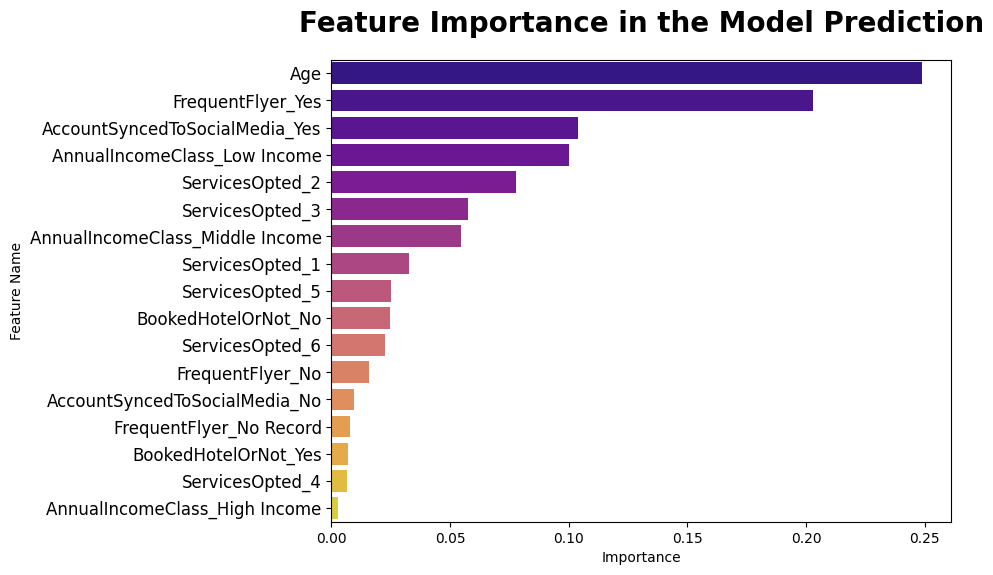

<Figure size 640x480 with 0 Axes>

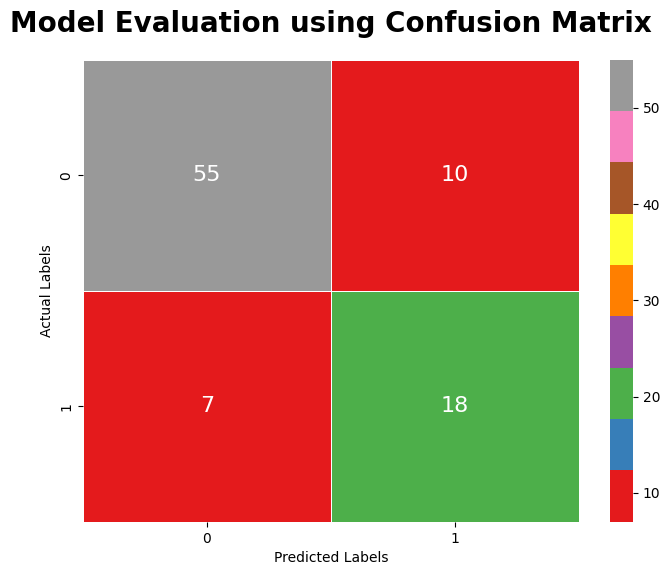

<Figure size 640x480 with 0 Axes>

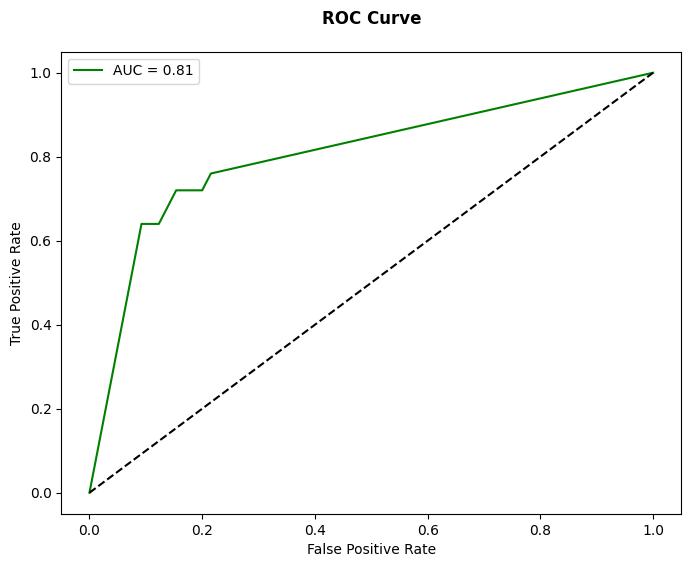

<Figure size 640x480 with 0 Axes>

In [418]:
model_evaluation(decision_tree_model, df, X_train, y_train, X_test, y_test)

### 5.2 Bagging classifier evaluation

Accuracy Score of Model on Training Data is => 94.96 %
Accuracy Score of Model on Testing Data  is => 80.0 %

F1 Score of the Model is => 66.67 %
Recall Score of the Model is => 72.0 %
Precision Score of the Model is => 62.07 %



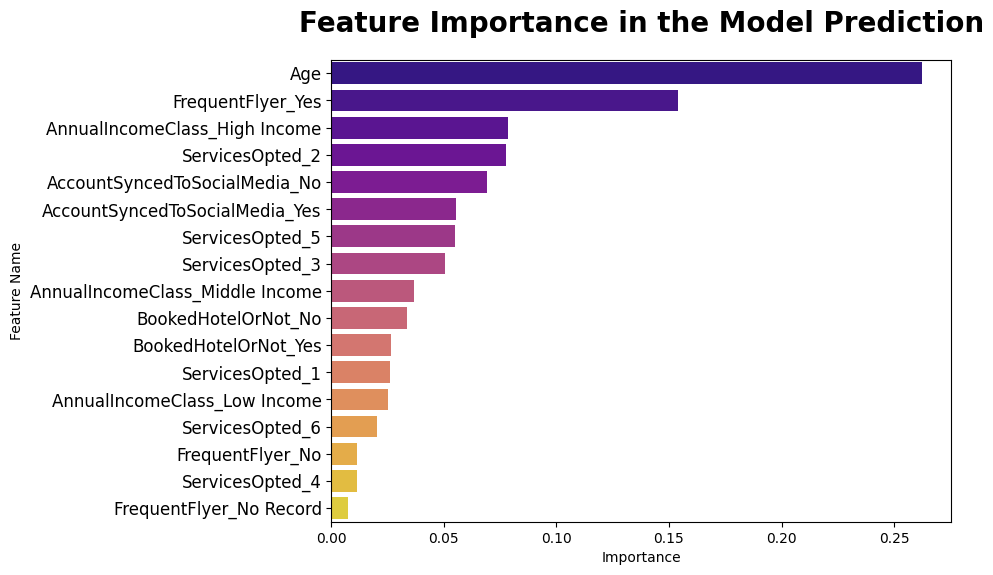

<Figure size 640x480 with 0 Axes>

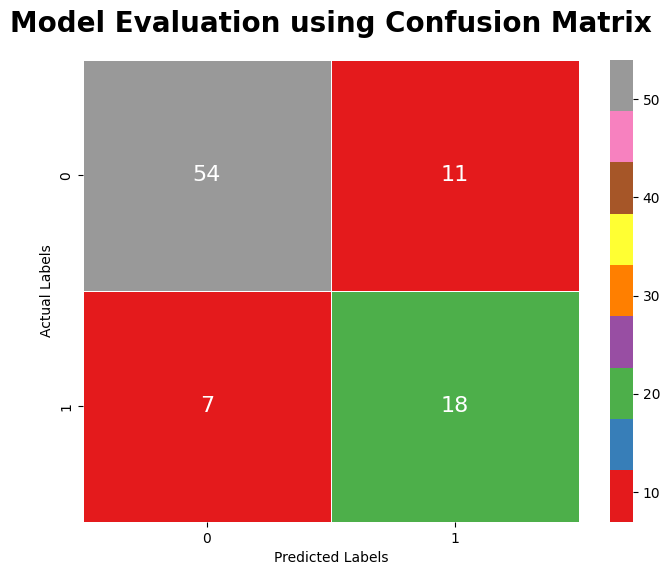

<Figure size 640x480 with 0 Axes>

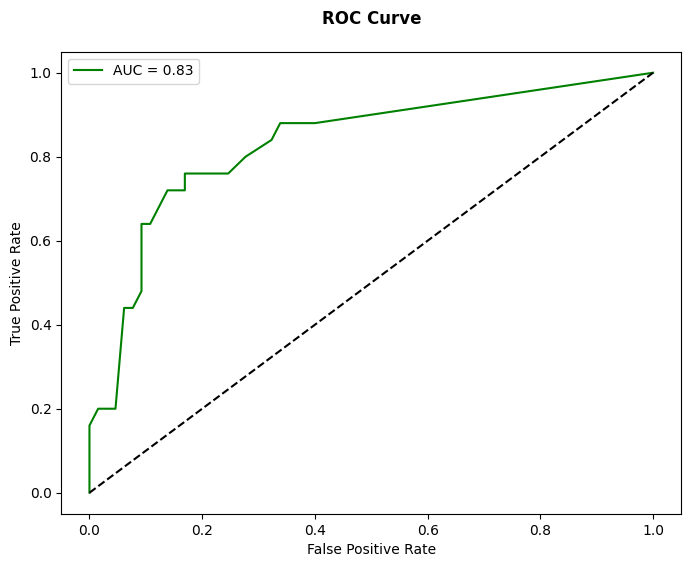

<Figure size 640x480 with 0 Axes>

In [419]:
model_evaluation(bagging_model, df, X_train, y_train, X_test, y_test)

### 5.3 Random forest classifier evaluation

Accuracy Score of Model on Training Data is => 87.11 %
Accuracy Score of Model on Testing Data  is => 77.78 %

F1 Score of the Model is => 61.54 %
Recall Score of the Model is => 64.0 %
Precision Score of the Model is => 59.26 %



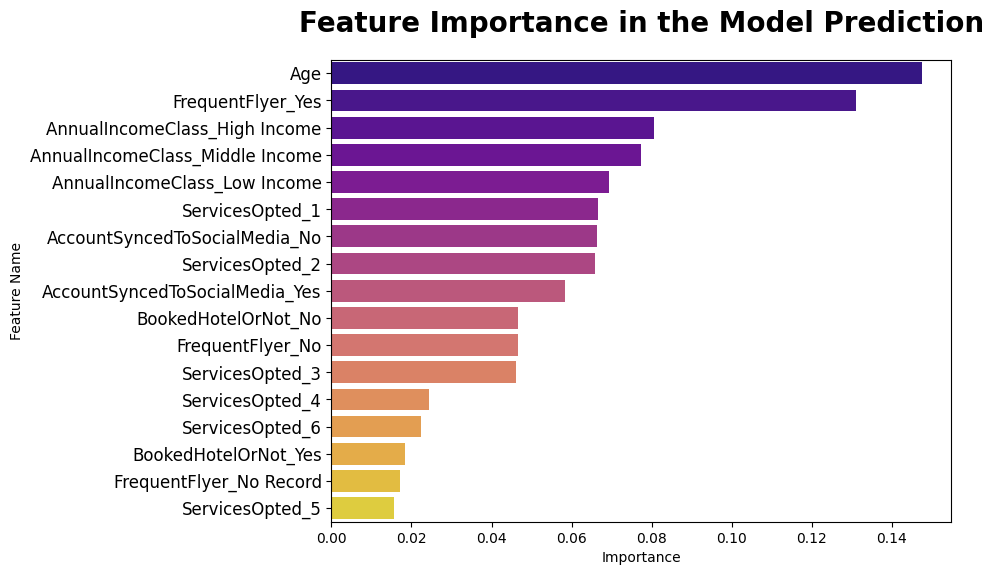

<Figure size 640x480 with 0 Axes>

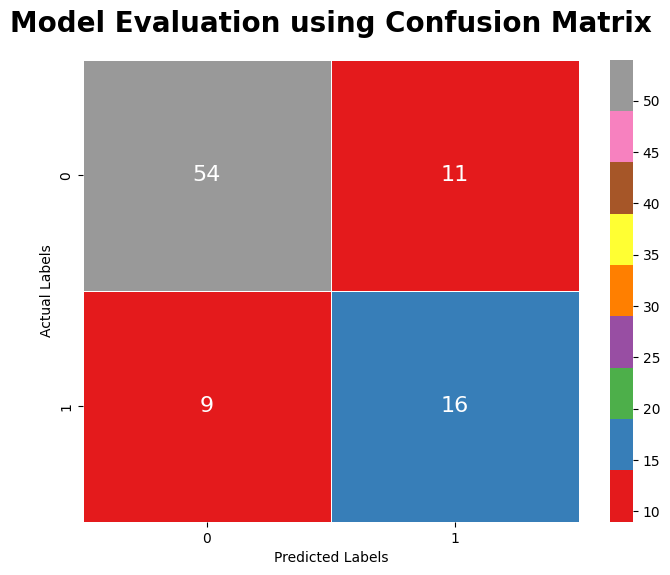

<Figure size 640x480 with 0 Axes>

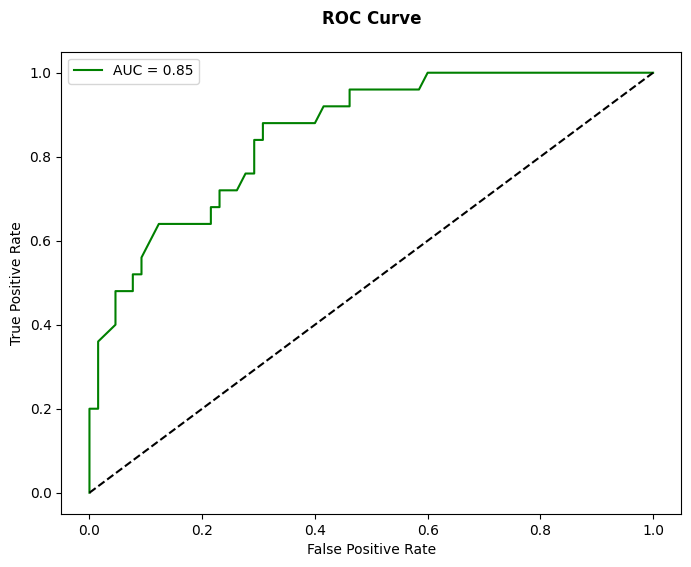

<Figure size 640x480 with 0 Axes>

In [420]:
model_evaluation(random_forest_model, df, X_train, y_train, X_test, y_test)

### 5.4 AdaBoost classifier evaluation

Accuracy Score of Model on Training Data is => 95.24 %
Accuracy Score of Model on Testing Data  is => 80.0 %

F1 Score of the Model is => 70.0 %
Recall Score of the Model is => 84.0 %
Precision Score of the Model is => 60.0 %



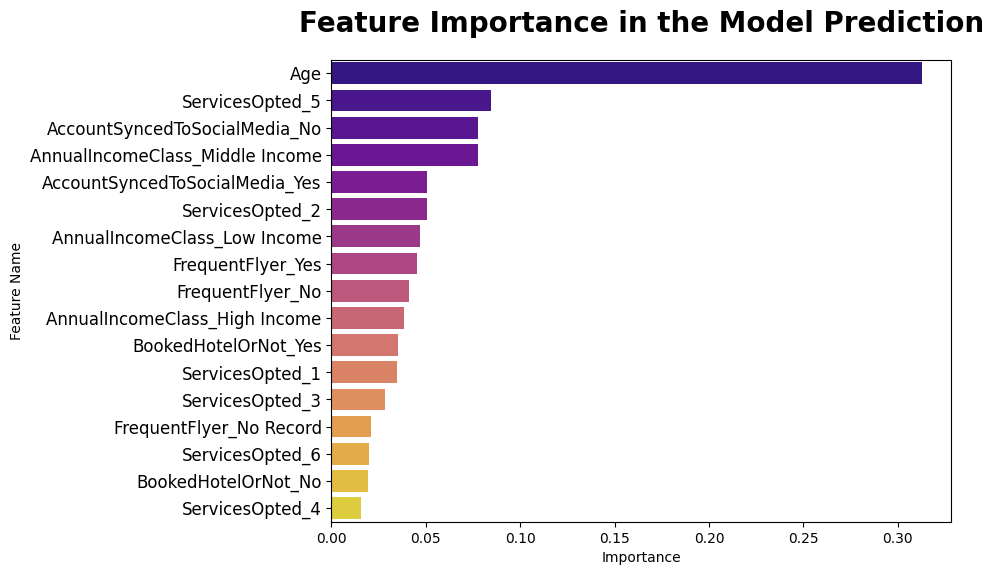

<Figure size 640x480 with 0 Axes>

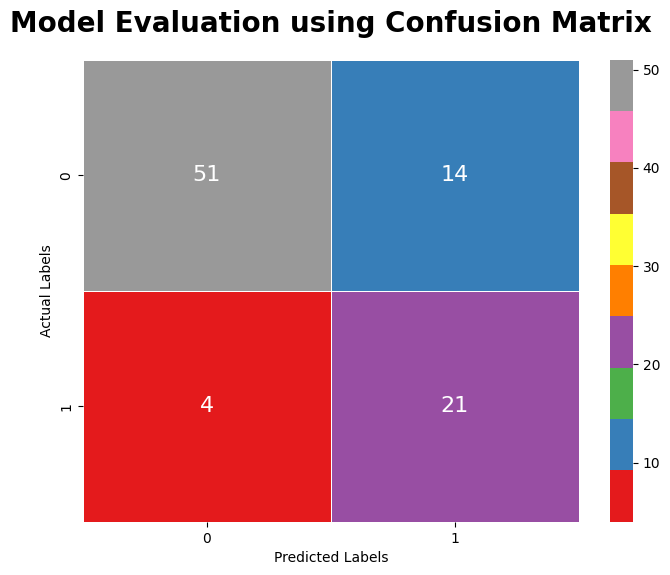

<Figure size 640x480 with 0 Axes>

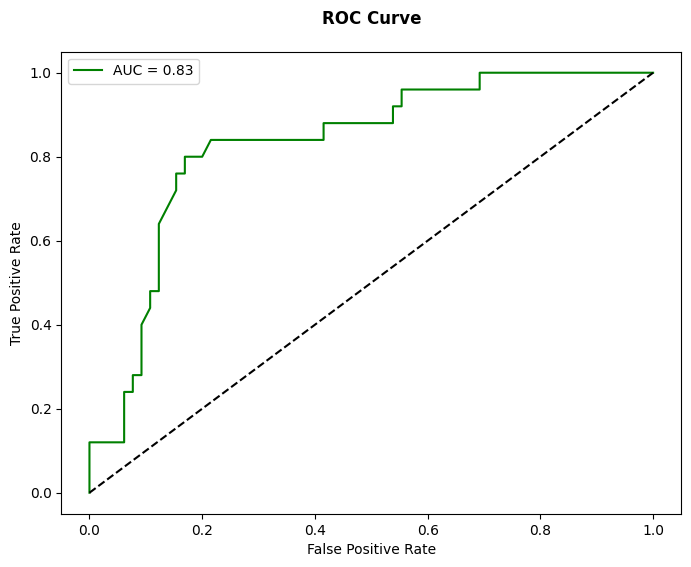

<Figure size 640x480 with 0 Axes>

In [421]:
model_evaluation(adaboost_model, df, X_train, y_train, X_test, y_test)

### 5.5 XGBoost classifier evaluation

Accuracy Score of Model on Training Data is => 95.24 %
Accuracy Score of Model on Testing Data  is => 67.78 %

F1 Score of the Model is => 32.56 %
Recall Score of the Model is => 28.0 %
Precision Score of the Model is => 38.89 %



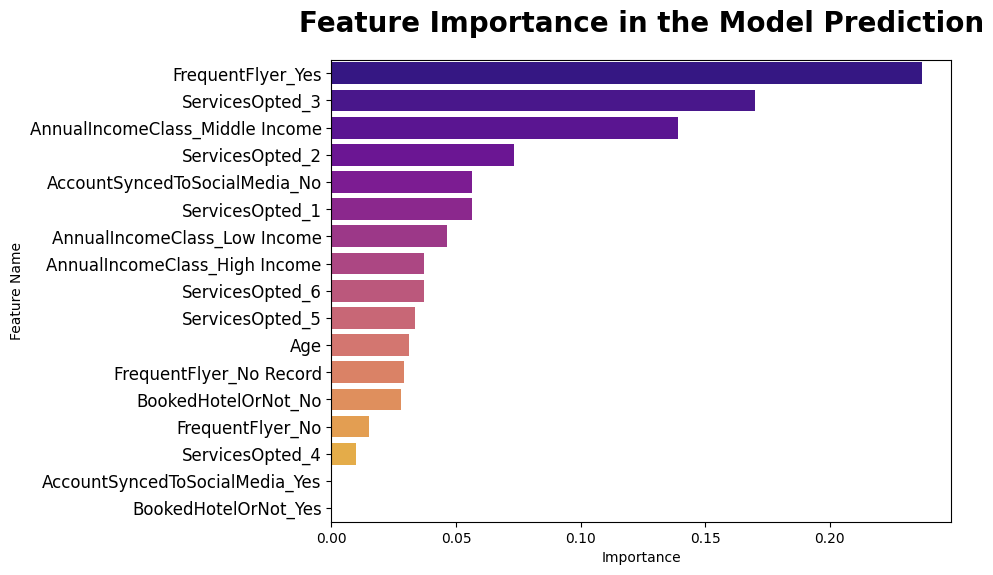

<Figure size 640x480 with 0 Axes>

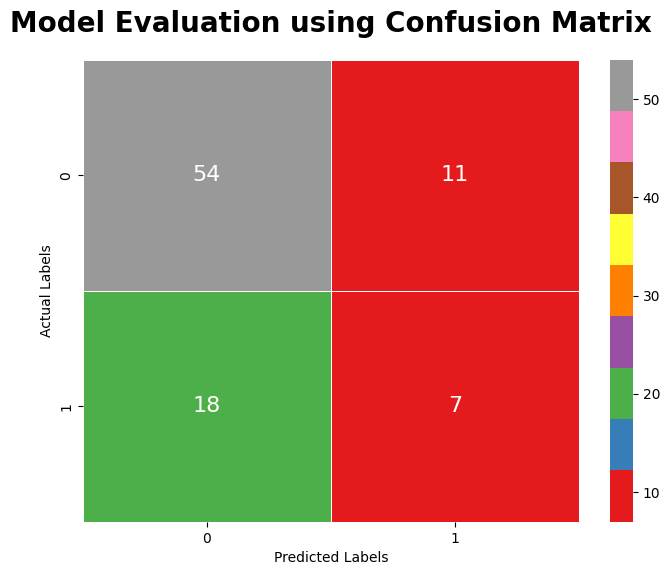

<Figure size 640x480 with 0 Axes>

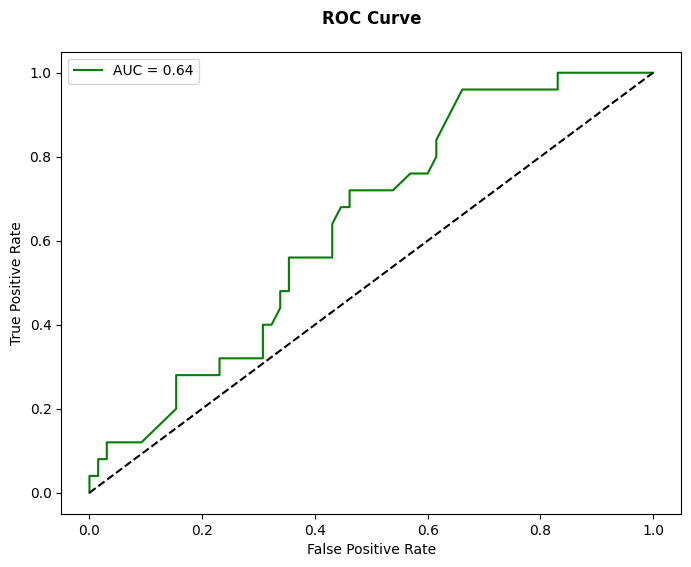

<Figure size 640x480 with 0 Axes>

In [422]:
model_evaluation(xgboost_model, df, X_train, y_train, X_test, y_test)

## 6.0 Deployment

Paper: ComfortJDDS8536-4 - Bagging and Boosting Analysis of Tour and Travel Customer Churn Data